### Практика - Реализация простого перцептрона

#### Пример кода

```
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def _activation_function(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        # Инициализация весов и смещения
        self.weights = np.random.rand(X.shape[1])
        self.bias = np.random.rand()

        # Цикл обучения
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # Вычисление выхода перцептрона
                net_input = np.dot(X[i], self.weights) + self.bias
                output = self._activation_function(net_input)

                # Обновление весов и смещения
                self.weights += self.learning_rate * (y[i] - output) * X[i]
                self.bias += self.learning_rate * (y[i] - output)

    def predict(self, X):
        # Вычисление выхода перцептрона для новых данных
        net_input = np.dot(X, self.weights) + self.bias
        return self._activation_function(net_input)


# Пример использования для логического ИЛИ
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

# Создание и обучение перцептрона
perceptron = Perceptron()
perceptron.fit(X, y)

# Проверка на тестовых данных
test_data = np.array([[0, 1], [1, 0], [1, 1], [0, 0]])
predictions = [perceptron.predict(x) for x in test_data]

# Вывод результатов
print("Predictions:", predictions)
```

#### Объяснение

- Класс Perceptron:
  - Конструктор (init) инициализирует скорость обучения (learning_rate), количество эпох (epochs), а также веса (weights) и смещение (bias) случайными значениями.
  - Метод _activation_function реализует функцию активации (в данном случае, ступенчатую функцию).
  - Метод fit обучает перцептрон на входных данных (X) и метках (y):
    - Инициализирует веса и смещение.
    - Проходит по всем эпохам и примерам в обучающей выборке.
    - Вычисляет выход перцептрона для текущего примера.
    - Обновляет веса и смещение на основе ошибки предсказания.
  - Метод predict вычисляет выход перцептрона для новых данных.

#### Пример использования

- Создается обучающая выборка для логического ИЛИ.
- Создается экземпляр класса Perceptron и обучается на данных.
- Создается тестовая выборка.
- Вычисляются предсказания для тестовой выборки.
- Результаты выводятся на экран.

#### Реализация кода

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def _activation_function(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        # Инициализация весов и смещения
        self.weights = np.random.rand(X.shape[1])
        self.bias = np.random.rand()

        # Цикл обучения
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # Вычисление выхода перцептрона
                net_input = np.dot(X[i], self.weights) + self.bias
                output = self._activation_function(net_input)

                # Обновление весов и смещения
                self.weights += self.learning_rate * (y[i] - output) * X[i]
                self.bias += self.learning_rate * (y[i] - output)

    def predict(self, X):
        # Вычисление выхода перцептрона для новых данных
        net_input = np.dot(X, self.weights) + self.bias
        return self._activation_function(net_input)


# Пример использования для логического ИЛИ
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

# Создание и обучение перцептрона
perceptron = Perceptron()
perceptron.fit(X, y)

# Проверка на тестовых данных
test_data = np.array([[0, 1], [1, 0], [1, 1], [0, 0]])
predictions = [perceptron.predict(x) for x in test_data]

# Вывод результатов
print("Predictions:", predictions)



Predictions: [1, 1, 1, 0]


### Практика - Обучение MLP на наборе данных MNIST для распознавания рукописных цифр с использованием Keras.

#### Пример кода

```
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Загрузка набора данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Предобработка данных

# Нормализация пикселей (от 0 до 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Преобразование данных в вектор
x_train = x_train.reshape((60000, 28 * 28))
x_test = x_test.reshape((10000, 28 * 28))

# One-hot кодирование меток
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Создание модели MLP
model = keras.Sequential([layers.Dense(512, activation="relu", input_shape=(28 * 28,)),
                          layers.Dense(256, activation="relu"),
                          layers.Dense(10, activation="softmax"),])

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Оценка модели
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

# Сохранение модели
model.save('mnist_mlp_model.h5')
```

#### Объяснение

- Загрузка и предобработка данных:
  - Загрузка набора данных MNIST из Keras.
  - Преобразование типов данных в float32.
  - Нормализация значений пикселей от 0 до 1 для улучшения обучения.
  - Преобразование изображений 28x28 в векторы длиной 784.
  - Преобразование меток в one-hot кодирование (например, цифра 3 становится вектором 0, 0, 0, 1, 0, 0, 0, 0, 0, 0).
- Создание модели MLP:
  - Создание последовательной модели Keras (keras.Sequential).
- Добавление трех слоев:
  - Первый скрытый слой с 512 нейронами, функцией активации ReLU и входным размером 784.
  - Второй скрытый слой с 256 нейронами и функцией активации ReLU.
  - Выходной слой с 10 нейронами (по количеству классов) и функцией активации softmax для получения вероятностей классов.
- Компиляция модели:
  - Выбор функции потерь categorical_crossentropy для задачи многоклассовой классификации.
  - Выбор оптимизатора adam для обновления весов.
  - Указание метрики accuracy для отслеживания точности во время обучения.
- Обучение модели:
  - Вызов метода fit для обучения модели на обучающих данных.
  - Указание количества эпох (10), размера партии (128) и доли данных для валидации (0.2).
- Оценка модели:
  - Вызов метода evaluate для оценки модели на тестовых данных.
  - Вывод значений потерь и точности.
- Сохранение модели:
  - Сохранение обученной модели в файл mnist_mlp_model.h5.

Этот код обучает простую MLP для распознавания рукописных цифр из набора данных MNIST. Вы можете изменять архитектуру модели, гиперпараметры и оптимизаторы для улучшения ее производительности.

#### Реализация кода

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Загрузка набора данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Предобработка данных

# Нормализация пикселей (от 0 до 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Преобразование данных в вектор
x_train = x_train.reshape((60000, 28 * 28))
x_test = x_test.reshape((10000, 28 * 28))

# One-hot кодирование меток
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Создание модели MLP
model = keras.Sequential([layers.Dense(512, activation="relu", input_shape=(28 * 28,)),
                          layers.Dense(256, activation="relu"),
                          layers.Dense(10, activation="softmax"),])

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Оценка модели
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

# Сохранение модели
model.save('mnist_mlp_model.h5')

C:\Users\Viki\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8578 - loss: 0.4701 - val_accuracy: 0.9603 - val_loss: 0.1285
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9712 - loss: 0.0959 - val_accuracy: 0.9729 - val_loss: 0.0909
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9829 - loss: 0.0556 - val_accuracy: 0.9727 - val_loss: 0.0916
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9880 - loss: 0.0377 - val_accuracy: 0.9758 - val_loss: 0.0837
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9917 - loss: 0.0268 - val_accuracy: 0.9782 - val_loss: 0.0797
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9935 - loss: 0.0194 - val_accuracy: 0.9763 - val_loss: 0.0866
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9954 - loss: 0.0155 - val_accuracy: 0.9782 - val_loss: 0.0832
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9953 - loss: 0.0155 - val_accuracy: 0.

Loss: 0.08042571693658829
Accuracy: 0.9812999963760376


### Практика - Пример: Создание автоэнкодера для сжатия изображений из набора данных CIFAR-10 с помощью Keras.

#### Пример кода

```
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

# Загрузка набора данных CIFAR-10
(x_train, _), (x_test, _) = cifar10.load_data()


# Предобработка данных

# Нормализация пикселей (от 0 до 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Преобразование данных в вектор
x_train = x_train.reshape((len(x_train), 32 * 32 * 3))
x_test = x_test.reshape((len(x_test), 32 * 32 * 3))


# Размерность кодированного представления (бутылочное горлышко)
encoding_dim = 32

# Создание кодера
input_img = keras.Input(shape=(32 * 32 * 3,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

# Создание декодера
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(32 * 32 * 3, activation='sigmoid')(decoded)

# Создание автоэнкодера
autoencoder = keras.Model(input_img, decoded)

# Компиляция автоэнкодера
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Обучение автоэнкодера
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Сохранение автоэнкодера
autoencoder.save('cifar10_autoencoder.h5')

# Получение кодированных изображений (сжатие)
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# Декодирование сжатых изображений (восстановление)
decoded_imgs = autoencoder.predict(x_test)

# Визуализация результатов (опционально)
import matplotlib.pyplot as plt

n = 10  # Количество изображений для отображения
plt.figure(figsize=(20, 4))
for i in range(n):
    # Отображение исходного изображения
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Отображение восстановленного изображения
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
```

#### Объяснение

- Загрузка и предобработка данных: аналогично предыдущему примеру.
- Создание кодера:
  - Создается входной слой с размерностью 3072 (32x32x3).
  - Добавляются три полносвязных слоя с уменьшающимся количеством нейронов (128, 64, encoding_dim), чтобы сжать информацию в кодированное представление.
- Создание декодера:
  - Используются три полносвязных слоя с увеличивающимся количеством нейронов (64, 128, 3072), чтобы восстановить изображение из кодированного представления.
- Создание и компиляция автоэнкодера:
  - Создается модель keras.Model, объединяющая кодер и декодер.
  - Компилируется с оптимизатором adam и функцией потерь binary_crossentropy.
- Обучение автоэнкодера:
  - Модель обучается на обучающей выборке (изображения сжимаются и восстанавливаются), используя тестовую выборку для валидации.
- Сохранение автоэнкодера: Сохраняем обученную модель.
- Получение кодированных и декодированных изображений:
  - Создается отдельная модель encoder для получения кодированных изображений.
  - Декодированные изображения получаются из полной модели autoencoder.
- Визуализация результатов (опционально): отображаются исходные и восстановленные изображения для сравнения.

#### Реализация кода

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step 
Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.6646 - val_loss: 0.6289
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.6173 - val_loss: 0.6073
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.6052 - val_loss: 0.6036
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.6027 - val_loss: 0.6018
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.6005 - val_loss: 0.5995
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5980 - val_loss: 0.5981
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5970 - val_loss: 0.5968
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5946 - val_loss: 0.5953
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5942 - val_loss: 0.5941
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5931 - val_loss: 0.5937
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5931 - val_

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


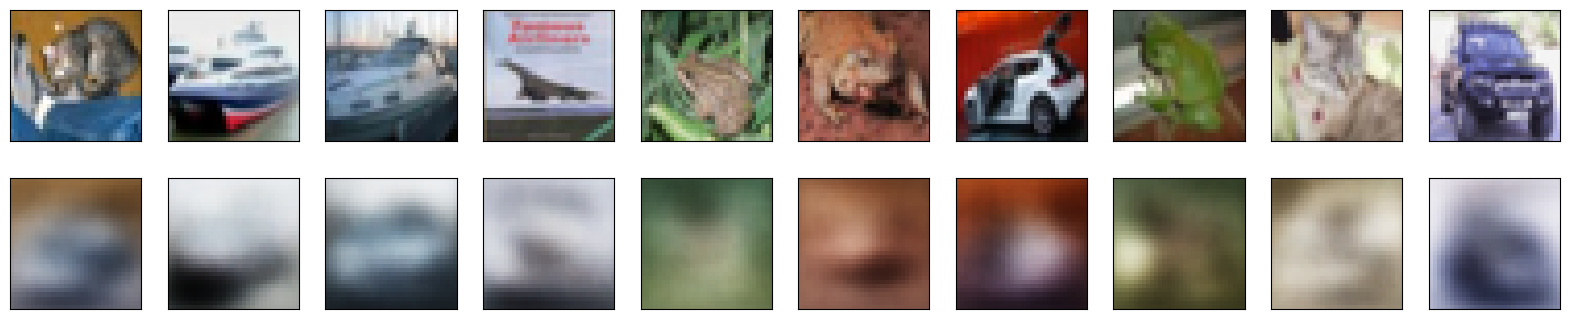

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

# Загрузка набора данных CIFAR-10
(x_train, _), (x_test, _) = cifar10.load_data()


# Предобработка данных

# Нормализация пикселей (от 0 до 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Преобразование данных в вектор
x_train = x_train.reshape((len(x_train), 32 * 32 * 3))
x_test = x_test.reshape((len(x_test), 32 * 32 * 3))


# Размерность кодированного представления (бутылочное горлышко)
encoding_dim = 32

# Создание кодера
input_img = keras.Input(shape=(32 * 32 * 3,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

# Создание декодера
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(32 * 32 * 3, activation='sigmoid')(decoded)

# Создание автоэнкодера
autoencoder = keras.Model(input_img, decoded)

# Компиляция автоэнкодера
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Обучение автоэнкодера
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Сохранение автоэнкодера
autoencoder.save('cifar10_autoencoder.h5')

# Получение кодированных изображений (сжатие)
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# Декодирование сжатых изображений (восстановление)
decoded_imgs = autoencoder.predict(x_test)

# Визуализация результатов (опционально)
import matplotlib.pyplot as plt

n = 10  # Количество изображений для отображения
plt.figure(figsize=(20, 4))
for i in range(n):
    # Отображение исходного изображения
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Отображение восстановленного изображения
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Практика - Создание модели для генерации текста на основе LSTM, обученной на корпусе текстов 

#### Пример кода

```
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np


# Загрузка текстового корпуса (пример: произведения Шекспира)
with open("shakespeare.txt", "r", encoding="utf-8") as f:
    text = f.read().lower()

# Создание словаря (все уникальные символы)
chars = sorted(list(set(text)))
char_to_int = {c: i for i, c in enumerate(chars)}
int_to_char = {i: c for i, c in enumerate(chars)}

# Создание обучающих данных
seq_length = 100
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_length, step):
    sentences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

# Преобразование текста в числовые данные
x = np.zeros((len(sentences), seq_length, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1

# Создание модели LSTM
model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, len(chars))))
model.add(Dense(len(chars), activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam")

# Обучение модели
early_stopping = EarlyStopping(monitor="loss", patience=5)
model.fit(x, y, epochs=50, batch_size=128, callbacks=[early_stopping])

# Генерация текста
def generate_text(start_index=np.random.randint(0, len(text) - seq_length), temperature=1.0):
    generated_text = text[start_index: start_index + seq_length]
    for i in range(400):
        sampled = np.zeros((1, seq_length, len(chars)))
        for t, char in enumerate(generated_text[-seq_length:]):
            sampled[0, t, char_to_int[char]] = 1.
        preds = model.predict(sampled, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = int_to_char[next_index]
        generated_text += next_char
    return generated_text

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype("float64")
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# Пример генерации текста
print(generate_text())
```

#### Пояснение

- Загрузка и подготовка данных:
  - Загрузите текстовый корпус (в этом примере "shakespeare.txt").
  - Создайте словарь символов, чтобы преобразовывать текст в числовые данные.
  - Разделите текст на последовательности символов (предложения) и ожидаемые следующие символы.
  - Преобразуйте текстовые данные в числовые, используя one-hot кодирование.
- Создание и обучение модели:
  - Создайте модель LSTM с помощью Keras.
  - Скомпилируйте модель, указав функцию потерь, оптимизатор и метрики.
  - Обучите модель на подготовленных данных, используя EarlyStopping для предотвращения переобучения.
- Генерация текста:
  - Функция generate_text принимает начальный текст и температуру в качестве входных данных.
  - На основе начального текста модель предсказывает вероятности следующего символа.
  - Используя температуру, выбирается следующий символ (более высокая температура - более случайный текст).
  - Процесс повторяется, пока не будет сгенерирован текст нужной длины.

Обратите внимание:
- Вам нужно будет заменить "shakespeare.txt" на фактическое имя файла с текстовым корпусом.
- Для достижения хороших результатов может потребоваться настроить параметры модели, такие как количество эпох, размер партии и архитектура модели.
- Температура влияет на разнообразие генерируемого текста. Низкие значения температуры (ближе к 0) делают текст более предсказуемым, а высокие значения (больше 1) делают текст более случайным.

#### Реализация кода

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np


# Загрузка текстового корпуса (пример: произведения Шекспира)
with open("shakespeare.txt", "r", encoding="utf-8") as f:
    text = f.read().lower()

# Создание словаря (все уникальные символы)
chars = sorted(list(set(text)))
char_to_int = {c: i for i, c in enumerate(chars)}
int_to_char = {i: c for i, c in enumerate(chars)}

# Создание обучающих данных
seq_length = 100
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_length, step):
    sentences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

# Преобразование текста в числовые данные
x = np.zeros((len(sentences), seq_length, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1

# Создание модели LSTM
model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, len(chars))))
model.add(Dense(len(chars), activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam")

# Обучение модели
early_stopping = EarlyStopping(monitor="loss", patience=5)
model.fit(x, y, epochs=2, batch_size=128, callbacks=[early_stopping])

# Генерация текста
def generate_text(start_index=np.random.randint(0, len(text) - seq_length), temperature=1.0):
    generated_text = text[start_index: start_index + seq_length]
    for i in range(400):
        sampled = np.zeros((1, seq_length, len(chars)))
        for t, char in enumerate(generated_text[-seq_length:]):
            sampled[0, t, char_to_int[char]] = 1.
        preds = model.predict(sampled, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = int_to_char[next_index]
        generated_text += next_char
    return generated_text

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype("float64")
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# Пример генерации текста
print(generate_text())

Epoch 1/2
14158/14158 ━━━━━━━━━━━━━━━━━━━━ 1370s 97ms/step - loss: 2.1321 
Epoch 2/2
14158/14158 ━━━━━━━━━━━━━━━━━━━━ 1234s 87ms/step - loss: 1.6009


foreign royalty.
    this inundation of mistemp'red humour
    rests by you only to be qualified.
    by noberside's shall some might.
  eph. i may unhath some bod from you'blen
    and play hive; deway come nasia feach of theight's ere for
    think you kange begary ay with anque my dome looks his pray.
  learus. we adain i shall be ney a days of minethort, ouf any
    wordy great to your chaice of yoo ear me; indine refown part,
                         yolk king, i fooling toak,
  nor beatifn


### Практика - Классификация изображений 

#### Пример кода

```
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Генерация данных: фигуры (круги, квадраты, треугольники)
def generate_shape(shape, size=28, noise=0.1):
    """Генерирует изображение фигуры."""
    image = np.zeros((size, size))
    center = size // 2
    radius = size // 4
    if shape == 'circle':
        for i in range(size):
            for j in range(size):
                if np.sqrt((i - center)**2 + (j - center)**2) <= radius:
                    image[i, j] = 1

    elif shape == 'square':
        image[center - radius:center + radius, center - radius:center + radius] = 1
    elif shape == 'triangle':
        for i in range(size):
            for j in range(size):
                if (i >= center and j >= center - (i - center) and j <= center + (i - center)):
                    image[i, j] = 1
    image += np.random.randn(size, size) * noise
    return image

# Создание набора данных
n_samples = 1000
shapes = ['circle', 'square', 'triangle']
X = np.zeros((n_samples, 28, 28, 1))
y = np.zeros(n_samples)

for i in range(n_samples):
    shape_idx = np.random.randint(0, len(shapes))
    X[i, :, :, 0] = generate_shape(shapes[shape_idx])
    y[i] = shape_idx

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Создание модели CNN
model = keras.Sequential([layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
                          layers.MaxPooling2D(pool_size=(2, 2)),
                          layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
                          layers.MaxPooling2D(pool_size=(2, 2)),
                          layers.Flatten(),
                          layers.Dense(10, activation='relu'),
                          layers.Dense(len(shapes), activation='softmax')])

# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Оценка модели
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

# Визуализация предсказаний (опционально)
predictions = model.predict(X_test)
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i, :, :, 0], cmap=plt.cm.binary)
    plt.xlabel(shapes[np.argmax(predictions[i])])

plt.show()

#### Объяснение кода

- Генерация данных:
  - Функция generate_shape создает изображение заданной фигуры (круг, квадрат, треугольник) с шумом.
  - Создается набор данных из n_samples изображений с метками классов (0, 1, 2).
- Создание модели CNN:
  - Два сверточных слоя (Conv2D) с функцией активации ReLU.
  - Два слоя пулинга (MaxPooling2D).
  - Слой Flatten для преобразования многомерных данных в вектор.
  - Полносвязный слой (Dense) с 10 нейронами и ReLU.
  - Выходной слой (Dense) с количеством нейронов, равным количеству классов, и функцией активации softmax.
- Компиляция модели:
  - Оптимизатор: adam.
  - Функция потерь: sparse_categorical_crossentropy (для целочисленных меток классов).
  - Метрика: accuracy.
- Обучение модели: Модель обучается на обучающей выборке с валидацией на тестовой выборке.
- Оценка модели: Вычисляются значения потерь и точности на тестовой выборке.
- Визуализация предсказаний: Отображаются изображения из тестовой выборки с предсказанными метками классов.


Этот пример демонстрирует, как создать и обучить простую CNN для  классификации изображений фигур. Вы можете изменять  архитектуру модели, гиперпараметры и данные для решения других задач  классификации изображений.

#### Реализация кода

Epoch 1/10


C:\Users\Viki\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9149 - loss: 0.8391 - val_accuracy: 1.0000 - val_loss: 0.0924
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0408 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 6.3069e-04
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 5.7281e-04 - val_accuracy: 1.0000 - val_loss: 4.6498e-04
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 4.4336e-04 - val_accuracy: 1.0000 - val_loss: 3.7535e-04
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 3.5229e-04 - val_accuracy: 1.0000 - val_loss: 3.1158e-04
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 2.8682e-04 - val_accuracy: 1.0000 - val_loss: 2.6080e-04
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 2.4366e-04 - va

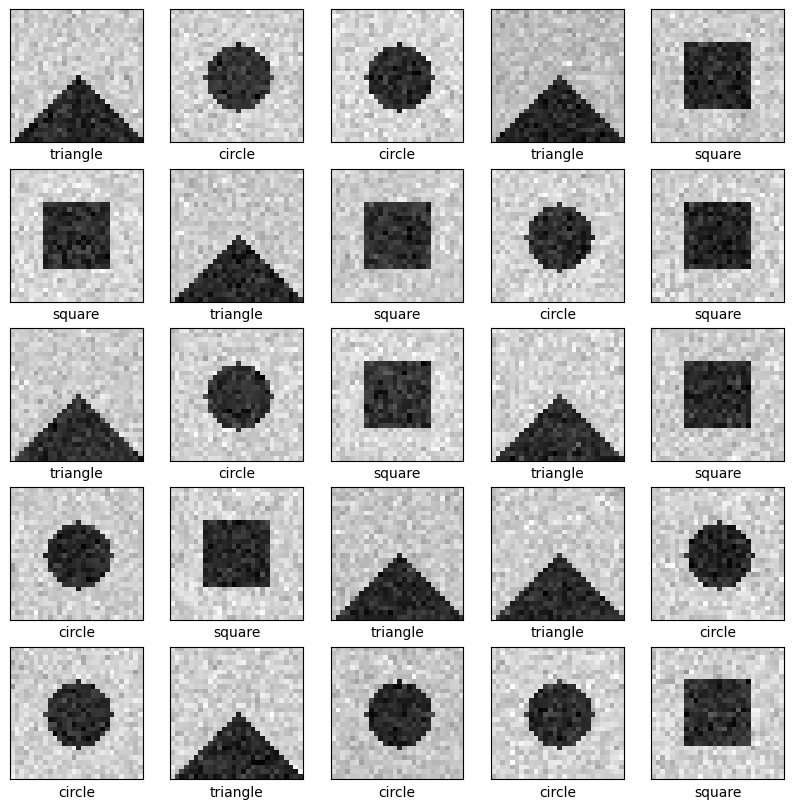

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Генерация данных: фигуры (круги, квадраты, треугольники)
def generate_shape(shape, size=28, noise=0.1):
    """Генерирует изображение фигуры."""
    image = np.zeros((size, size))
    center = size // 2
    radius = size // 4
    if shape == 'circle':
        for i in range(size):
            for j in range(size):
                if np.sqrt((i - center)**2 + (j - center)**2) <= radius:
                    image[i, j] = 1

    elif shape == 'square':
        image[center - radius:center + radius, center - radius:center + radius] = 1
    elif shape == 'triangle':
        for i in range(size):
            for j in range(size):
                if (i >= center and j >= center - (i - center) and j <= center + (i - center)):
                    image[i, j] = 1
    image += np.random.randn(size, size) * noise
    return image

# Создание набора данных
n_samples = 1000
shapes = ['circle', 'square', 'triangle']
X = np.zeros((n_samples, 28, 28, 1))
y = np.zeros(n_samples)

for i in range(n_samples):
    shape_idx = np.random.randint(0, len(shapes))
    X[i, :, :, 0] = generate_shape(shapes[shape_idx])
    y[i] = shape_idx

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Создание модели CNN
model = keras.Sequential([layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
                          layers.MaxPooling2D(pool_size=(2, 2)),
                          layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
                          layers.MaxPooling2D(pool_size=(2, 2)),
                          layers.Flatten(),
                          layers.Dense(10, activation='relu'),
                          layers.Dense(len(shapes), activation='softmax')])

# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Оценка модели
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

# Визуализация предсказаний (опционально)
predictions = model.predict(X_test)
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i, :, :, 0], cmap=plt.cm.binary)
    plt.xlabel(shapes[np.argmax(predictions[i])])

plt.show()